In [43]:
import pandas as pd
from StringIO import StringIO
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from IPython.display import display, display_html, display_markdown
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('legend', fontsize=15) 
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline

In [31]:
data = {}

for year, filename in (2011, "trips_2011.txt"), (2012, "trips_2012.txt"):
    data[year] = pd.read_table(filename, parse_dates=["Trip TimeStamp"], index_col=["TripId"], usecols=["TripId", "Trip TimeStamp", "Stable Beams", "Module", "Channel", "Det", "Side"])
    data[year]["channel_id"] = data[year].apply(lambda x: "M" + str(x["Module"]) + "C" + str(x["Channel"]), axis=1)
    display_html("<h2>head of %d data</h2>" % year, raw=True)
    display(data[year].head())
    
data = pd.concat(data, names=['year'])

head of 2011 data

,Trip TimeStamp,Stable Beams,Module,Channel,Det,Side,channel_id
TripId,,,,,,,
563,2011-11-27 00:44:33,Y,49,1,HEC,A,M49C1
562,2011-11-11 08:38:31,N,158,6,HEC,C,M158C6
561,2011-11-10 13:31:49,N,317,15,EMECPS,C,M317C15
560,2011-10-30 07:23:52,N,74,7,HEC,A,M74C7
559,2011-10-29 03:05:22,N,69,4,HEC,A,M69C4


head of 2012 data

,Trip TimeStamp,Stable Beams,Module,Channel,Det,Side,channel_id
TripId,,,,,,,
383,2013-02-06 06:43:19,Y,78,7,HEC,A,M78C7
382,2013-02-06 04:22:53,N,78,7,HEC,A,M78C7
381,2013-02-05 17:19:33,N,78,7,HEC,A,M78C7
380,2013-01-24 10:31:38,N,240,11,EMB,C,M240C11
379,2013-01-23 12:27:22,Y,224,14,EMB,A,M224C14


In [67]:
x = data_year["channel_id"].value_counts().head()
x.to_frame(name='#')

,#
M132C3,17
M161C3,9
M30C10,6
M4C4,6
M8C4,6


## Most tripped channels

In [71]:
display_markdown("### all years\n ----", raw=True)
display(data["channel_id"].value_counts().head().to_frame(name="# trips"))
for year, data_year in data.groupby(level='year'):
    display_markdown("### %d\n ----" % year, raw=True)
    display(data_year["channel_id"].value_counts().head().to_frame(name="# trips"))

### all years
 ----

,# trips
M142C11,18
M132C3,17
M102C1,12
M144C6,10
M30C10,10


### 2011
 ----

,# trips
M142C11,15
M102C1,10
M144C6,10
M31C4,9
M21C10,9


### 2012
 ----

,# trips
M132C3,17
M161C3,9
M30C10,6
M4C4,6
M8C4,6


Det
EMB       3
EMBPS     3
EMEC      7
HEC      23
Name: Det, dtype: int64


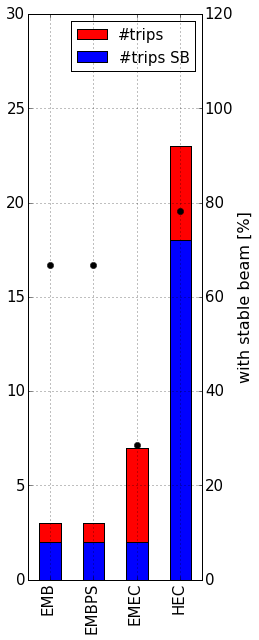

In [10]:
fig, ax = plt.subplots(figsize=(3.7, 9))
ax2 = ax.twinx()

trips_per_det = data.groupby("Det")["Det"].count()
print trips_per_det
trips_per_det_sb = data[data["Stable Beams"] == 'Y'].groupby("Det")['channel_id'].count()

j = pd.DataFrame(dict(trips_per_det = trips_per_det, trips_per_det_sb = trips_per_det_sb))
sb_fraction = j.trips_per_det_sb / j.trips_per_det * 100
sb_fraction.plot(marker = 'o', color='k', ls='', label='with stable beam [%]', ax=ax2)

j['trips_per_det'].plot(kind='bar', ax=ax, fc='r', label='#trips')
j['trips_per_det_sb'].plot(kind='bar', ax=ax, label='#trips SB')

ax2.grid(False)
ax2.set_ylim(0, 120)
ax2.set_ylabel('with stable beam [%]', fontsize=16)
ax.set_ylim(0, 30)

ax.set_xlabel('')
ax.legend()
plt.show()

fig.tight_layout()
fig.savefig('sb_2015.pdf')

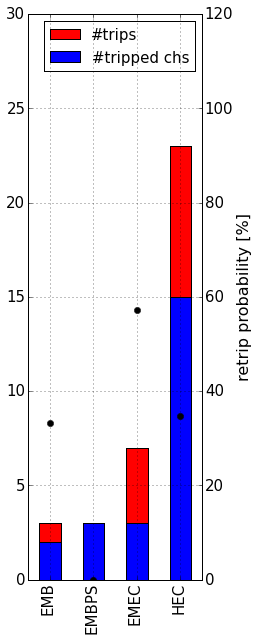

In [11]:
fig, ax = plt.subplots(figsize=(3.7, 9))
ax2 = ax.twinx()

trips_per_det = data.groupby("Det")["Det"].count()
tripped_per_det = data.groupby("Det")['channel_id'].unique().apply(len)

j = pd.DataFrame(dict(trips_per_det = trips_per_det, tripped_per_det = tripped_per_det))
retrip = (1. - j.tripped_per_det / j.trips_per_det) * 100

retrip.plot(marker = 'o', color='k', ls='', label='retrip [%]', ax=ax2, zorder=100)
j.trips_per_det.plot(kind='bar', ax=ax, fc='r', label='#trips')
j.tripped_per_det.plot(kind='bar', ax=ax, label='#tripped chs')
ax2.grid(False)
ax2.set_ylim(0, 120)
ax2.set_ylabel('retrip probability [%]', fontsize=16)
ax.set_ylim(0, 30)

ax.set_xlabel('')
ax.legend()
plt.show()

fig.tight_layout()
fig.savefig('summary_2015.pdf')

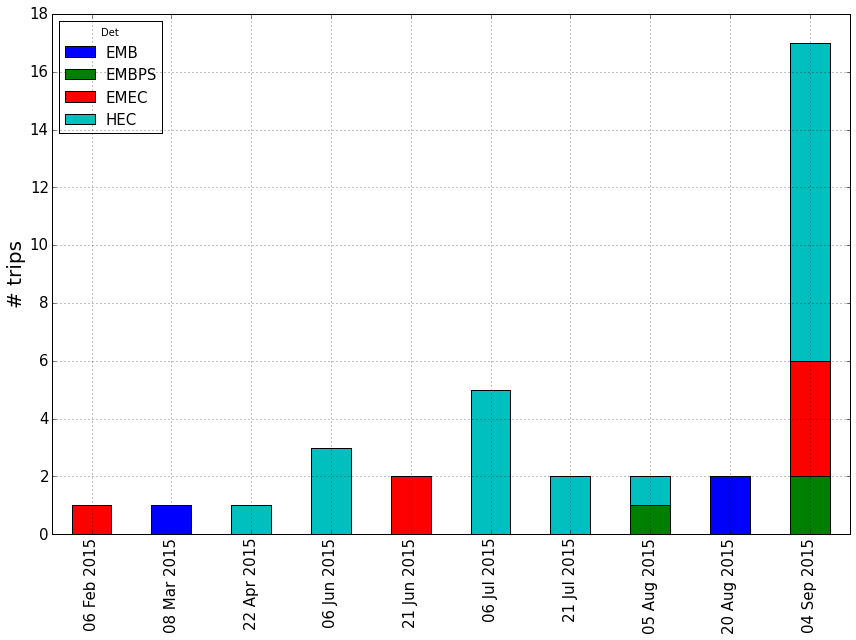

In [12]:
def plot_month(data):
    import matplotlib.dates as mdates

    import locale

    locale.setlocale(locale.LC_ALL, 'en_US')

    months = mdates.MonthLocator()  # every month
    monthsFmt = mdates.DateFormatter('%Y')

    fig, ax = plt.subplots(figsize=(12, 9))
    dg = data.groupby([pd.Grouper(freq='15D',key='Trip TimeStamp', closed='right'), "Det"])["Det"].count().unstack()
    dg.plot(kind='bar', ax=ax, stacked=True)
    ax.set_xticklabels([dt.strftime('%d %b %Y') for dt in dg.index])
    ax.set_ylabel("# trips")
    ax.set_xlabel("")
    fig.tight_layout()
    return fig

fig = plot_month(data)
plt.show()
fig.savefig('trips2015.pdf')

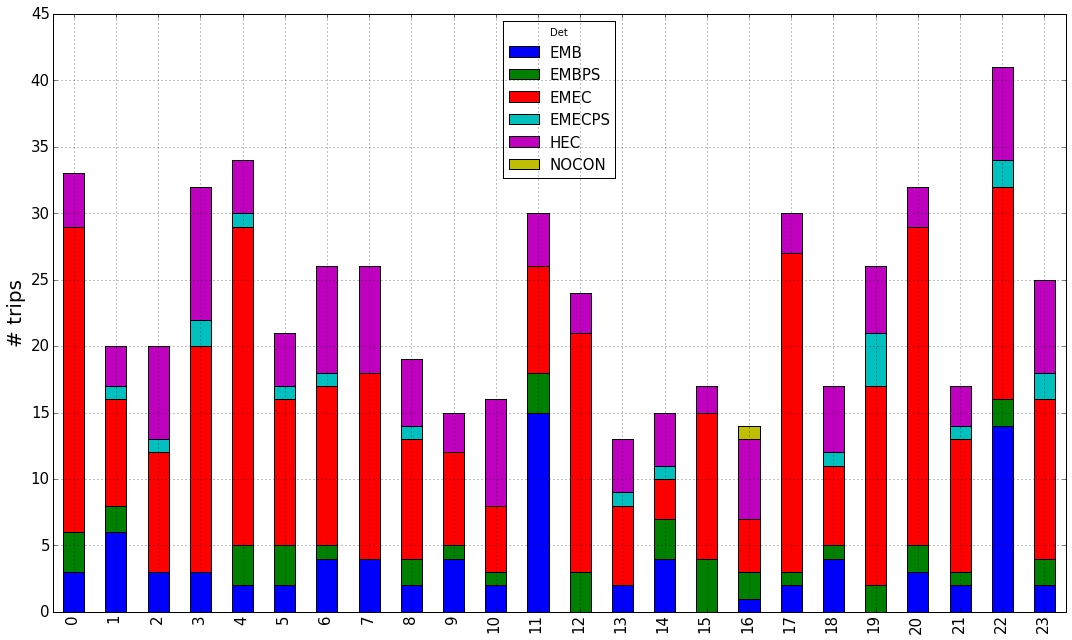

In [260]:
times = pd.DatetimeIndex(data["Trip TimeStamp"])
dg = data.groupby([times.hour, "Det"])["Det"].count().unstack()

import matplotlib.dates as mdates

import locale

locale.setlocale(locale.LC_ALL, 'en_US')

fig, ax = plt.subplots(figsize=(15, 9))
dg.plot(kind='bar', ax=ax, stacked=True)
#ax.set_xticklabels([dt.strftime('%d %b %Y') for dt in dg.index])
ax.set_ylabel("# trips")
ax.set_xlabel("")
fig.tight_layout()
plt.show()

In [5]:
import datetime
times = data["Trip TimeStamp"].astype(datetime.datetime)
days = (times.max() - times.min()).days
print "#trips = %d, trips / day = %.1f" % (len(data), len(data) / float(days))
trips_sb = (data['Stable Beams'] == 'Y').sum()
print "#trips with sb = %d (%.2f%%)" % (trips_sb, trips_sb / float(len(data)) * 100)

#trips = 36, trips / day = 0.2
#trips with sb = 24 (66.67%)
